## EDA on Lending club

In [420]:
# Importing the required libraries

import pandas as pd # for data manipulation in python
import numpy as np # for numerical computing in python
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for beautiful visualization and work in sync with matplotlib
import warnings
warnings.filterwarnings("ignore") # to remove package deprecation warning

pd.set_option("display.max_columns",None) # If you want to see all the columns

In [421]:
#Creating a dataframe for the loan.csv and seeing the data

loan_analysis = pd.read_csv("loan.csv")
loan_analysis.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [422]:
# To know how many rows and columns are there in this table

loan_analysis.shape

(39717, 111)

In [423]:
# As there are around 111 columns so to know how many data a particular column has

loan_analysis.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [424]:
# First I begin with removing all those columns which are non numeric at all place

loan_analysis.drop(loan_analysis.columns[loan_analysis.isna().all()], axis = 1, inplace = True)
loan_analysis.shape

(39717, 57)

In [425]:
# After dropping checking the columns

loan_analysis.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

The following columns are being removed which are irrelevant for the case study

1. id
2. member_id
3. pymnt_plan
4. url
5. desc
6. zip_code
7. delinq_2yrs
8. earliest_cr_line
9. inq_last_6mths
10. mths_since_last_delinq
11. mths_since_last_record
12. open_acc
13. pub_rec
14. revol_bal
15. revol_util
16. total_acc
17. initial_list_status
18. out_prncp','out_prncp_inv
19. total_pymnt_inv
20. total_rec_prncp
21. total_rec_int
22. total_rec_late_fee
23. recoveries
24. collection_recovery_feelast_pymnt_d
25. last_pymnt_amnt
26. next_pymnt_d
27. last_credit_pull_d
28. collections_12_mths_ex_med
29. policy_code
30. application_type
31. acc_now_delinq
32. chargeoff_within_12_mths
33. delinq_amnt
34. pub_rec_bankruptcies
35. tax_lien

In [426]:
# Removing unwanted columns for this case study

loan_analysis = loan_analysis.drop(['id', 'member_id', 'pymnt_plan', 'url', 'desc', 'zip_code', 'delinq_2yrs','earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq','mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal','revol_util', 'total_acc', 'initial_list_status', 'out_prncp','out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp','total_rec_int', 'total_rec_late_fee', 'recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt','next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med','policy_code', 'application_type', 'acc_now_delinq','chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies','tax_liens'], axis = 1)
loan_analysis.shape

(39717, 20)

In [427]:
# As case study require analysis for paid and unpaid loan takers

loan_data_filtered=loan_analysis[loan_Information_df.loan_status != 'Current']

In [428]:
# After filtering those data

loan_data_filtered.shape

(38577, 20)

In [429]:
loan_data_filtered.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,total_pymnt
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,5863.155187
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,1008.710000
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,3005.666844
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,12231.890000
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,5632.210000


In [430]:
# Now dropping all the rows whose emp_length is empty

loan_data_filtered = loan_data_filtered.drop(loan_data_filtered[loan_data_filtered.emp_length.isna()].index)

## Univariate analysis

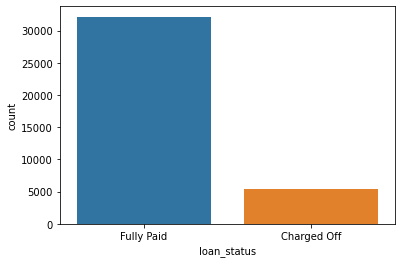

In [431]:
# Plotting graph for fully paid and charged off customers

sns.countplot(x= loan_data_filtered["loan_status"])
plt.show()

In [432]:
ChangedOfflength = len(loan_data_filtered[loan_data_filtered['loan_status']=='Charged Off'])
total_length = len(loan_data_filtered)
defaulterPercentage = int(ChangedOfflength)*100/int(total_length)
print("Defaulter percentage:",round(defaulterPercentage),"%")

Defaulter percentage: 14 %


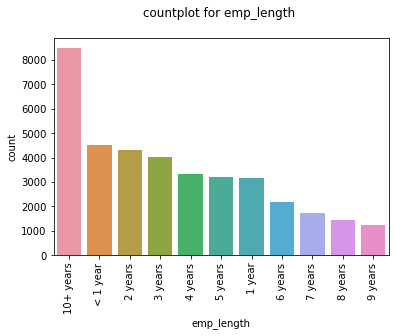

In [433]:
# Plotting graph based on work experience

plt.title("countplot for emp_length \n")
sns.countplot(loan_data_filtered["emp_length"],order = loan_data_filtered["emp_length"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [434]:
loan_data_filtered['emp_length'] =loan_data_filtered['emp_length'].replace('10+ years', '10', regex=True)
loan_data_filtered['emp_length'] =loan_data_filtered['emp_length'].replace(' years', '', regex=True)
loan_data_filtered['emp_length'] =loan_data_filtered['emp_length'].replace(' year', '', regex=True)
loan_data_filtered['emp_length'] =loan_data_filtered['emp_length'].replace('< 1', '0', regex=True)
loan_data_filtered['emp_length'] =loan_data_filtered['emp_length'].replace(' ', '', regex=True)
loan_data_filtered['emp_length'] =loan_data_filtered['emp_length'].str.replace('+', '', regex=True)

loan_data_filtered['term'] =loan_data_filtered['term'].replace(' months', '', regex=True)

loan_data_filtered['int_rate'] =loan_data_filtered['int_rate'].replace('%', '', regex=True)

In [436]:
#change the type of column to int
loan_data_filtered["emp_length"] = loan_data_filtered["emp_length"].astype(int)
loan_data_filtered["int_rate"] = loan_data_filtered["int_rate"].astype(float)

In [460]:
total_emp_length = len(loan_data_filtered)
aboveTenSize = len(loan_data_filtered[loan_data_filtered.emp_length > 8])
loanAfterTenYearsOfExperience = aboveTenSize*100/total_emp_length
round(loanAfterTenYearsOfExperience)
print("Interest rate applied to above 10 years experience:",round(loanAfterTenYearsOfExperience),"%")

Defaulter percentage above 10 years experience: 26 %


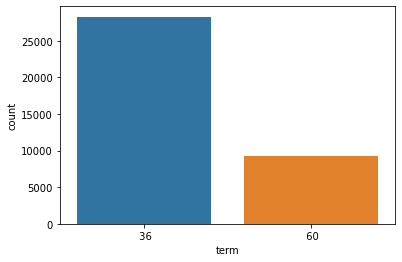

In [438]:
# Graph for how many took loan for 36 months and 60 months

sns.countplot(x= loan_data_filtered["term"])
plt.show()

In [439]:
term_total = len(loan_data_filtered)
duration = len(loan_data_filtered[loan_data_filtered["term"]==" 36"])
percentageOfterm = duration*100/term_total
round(percentageOfterm)

75

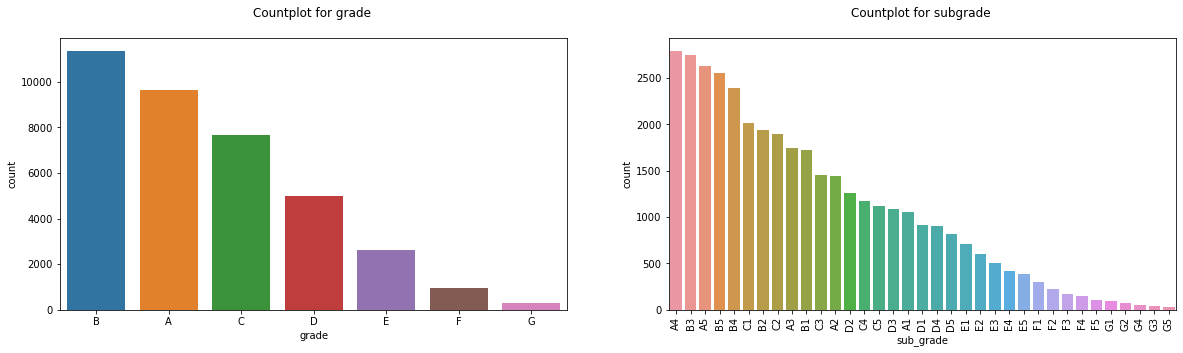

In [440]:
fig = plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title("Countplot for grade \n")
sns.countplot(loan_data_filtered["grade"],order = loan_data_filtered["grade"].value_counts().index)

plt.subplot(1,2,2)
plt.title("Countplot for subgrade \n")
sns.countplot(loan_data_filtered["sub_grade"],order = loan_data_filtered["sub_grade"].value_counts().index)
plt.xticks(rotation=90)


plt.show()

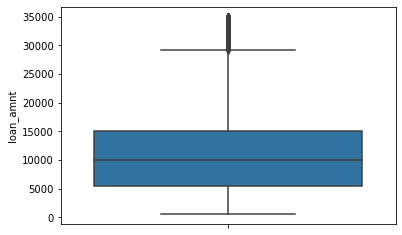

In [441]:
# loan amount reprenation
sns.boxplot( y=loan_data_filtered["loan_amnt"] )
plt.show()

<AxesSubplot:xlabel='count', ylabel='purpose'>

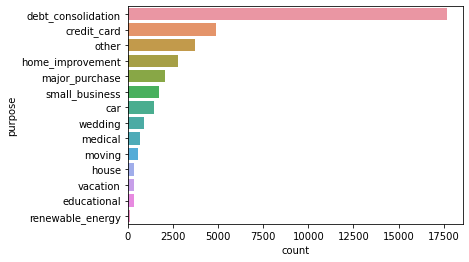

In [442]:
# The reasons for which loan is taken

sns.countplot(y=loan_data_filtered["purpose"],order = loan_data_filtered['purpose'].value_counts().index)

<AxesSubplot:xlabel='verification_status', ylabel='count'>

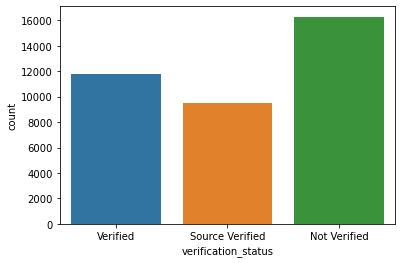

In [443]:
# How many applicants are verified
sns.countplot(loan_data_filtered["verification_status"])

In [444]:
nonVerifiedApplicants = len(loan_Information_df1[loan_Information_df1.verification_status=='Not Verified'])*100/len(loan_Information_df1)
print(round(nonVerifiedApplicants))
sourceVerifiedApplicants = len(loan_Information_df1[loan_Information_df1.verification_status=='Source Verified'])*100/len(loan_Information_df1)
print(round(sourceVerifiedApplicants))

43
25


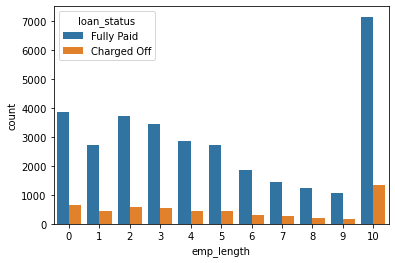

In [445]:
# Try to find relation between employee experience length and defaulters
sns.countplot(data = loan_data_filtered, x=loan_data_filtered["emp_length"], hue=loan_data_filtered["loan_status"])
plt.show()

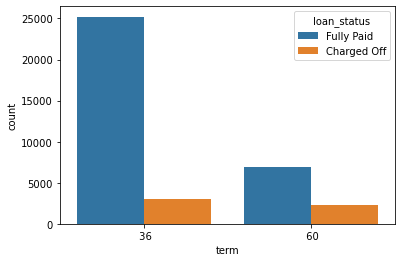

In [446]:
# Find the corellation between term of loan and percentage of defaulters
sns.countplot(data = loan_data_filtered, x=loan_data_filtered["term"], hue=loan_data_filtered["loan_status"])
plt.show()

In [447]:
ChargeOffFor60MonthDurationPercentage =len(loan_data_filtered[(loan_data_filtered.term==' 60') & (loan_data_filtered.loan_status=='Charged Off')])*100/(len(loan_Information_df1[loan_data_filtered.term==' 60']))

print(ChargeOffFor60MonthDurationPercentage)

ChargeOffFor36MonthDurationPercentage = len(loan_data_filtered[(loan_data_filtered.term==' 36') & (loan_data_filtered.loan_status=='Charged Off')])*100/(len(loan_Information_df1[loan_data_filtered.term==' 36']))

print(ChargeOffFor36MonthDurationPercentage)

25.126930971156963
10.863647611977234


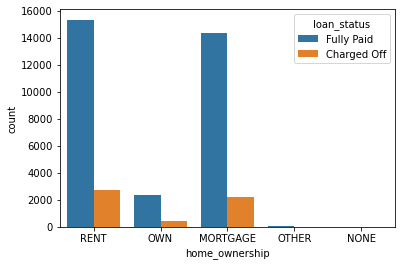

In [448]:
#Check how does home_ownershit affect the on account of defaulets
sns.countplot(data = loan_data_filtered, x=loan_data_filtered["home_ownership"], hue=loan_data_filtered["loan_status"])
plt.show()

In [449]:
rentedPercentateOfDefaulters = len(loan_data_filtered[(loan_data_filtered.home_ownership=='RENT') & (loan_data_filtered.loan_status=='Charged Off')])*100/(len(loan_data_filtered.home_ownership=='RENT'))
print(rentedPercentateOfDefaulters)                                                 

OwnPercentateOfDefaulters = len(loan_data_filtered[(loan_data_filtered.home_ownership=='OWN') & (loan_data_filtered.loan_status=='Charged Off')])*100/(len(loan_data_filtered.home_ownership=='OWN'))
print(OwnPercentateOfDefaulters)
                                                     
MortgagePercentateOfDefaulters = len(loan_data_filtered[(loan_data_filtered.home_ownership=='MORTGAGE') & (loan_data_filtered.loan_status=='Charged Off')])*100/(len(loan_data_filtered.home_ownership=='MORTGAGE'))
print(MortgagePercentateOfDefaulters)

7.287449392712551
1.0654165778819518
5.979650543362455


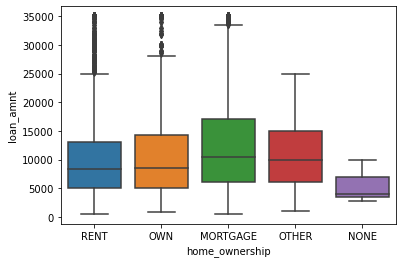

In [450]:
# Comaring loan amount with people owing there own place to stay
sns.boxplot(y=loan_data_filtered["loan_amnt"], x= loan_data_filtered["home_ownership"])
plt.show()

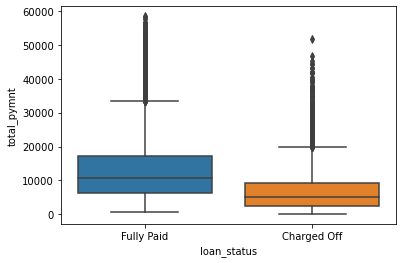

In [451]:
# Comparing loan amountamount paid with loan status
sns.boxplot(y=loan_data_filtered["total_pymnt"], x= loan_data_filtered["loan_status"])
plt.show()

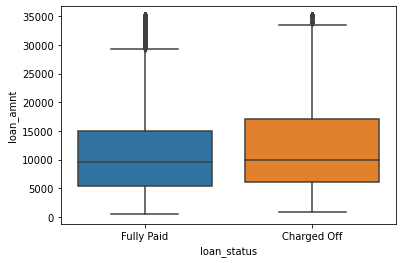

In [452]:
# Comparing loan amount with loan status
sns.boxplot( y=loan_data_filtered["loan_amnt"], x= loan_data_filtered["loan_status"])
plt.show()

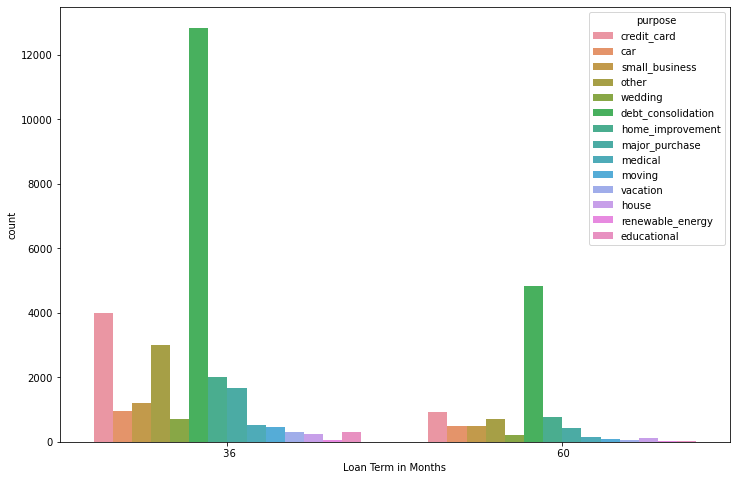

In [453]:
# The reasons for which people take loan in differt terms
plt.figure(figsize=(12,8))
sns.countplot( x="term", hue='purpose', data=loan_data_filtered)
plt.xlabel('Loan Term in Months')
plt.show()

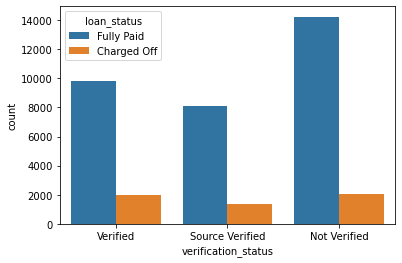

In [454]:
#Does verification of users affect the number of defaults?
sns.countplot(data = loan_data_filtered, x=loan_data_filtered["verification_status"], hue=loan_data_filtered["loan_status"])
plt.show()

In [455]:
verifiedPercentateOfDefaulters = len(loan_data_filtered[(loan_data_filtered.verification_status=='Verified') & (loan_data_filtered.loan_status=='Charged Off')])*100/(len(loan_data_filtered.verification_status=='Verified'))
print(rentedPercentateOfDefaulters)                                                 

SourceVerifiedPercentateOfDefaulters = len(loan_data_filtered[(loan_data_filtered.verification_status=='Source Verified') & (loan_data_filtered.loan_status=='Charged Off')])*100/(len(loan_data_filtered.verification_status=='Source Verified'))
print(OwnPercentateOfDefaulters)
                                                     
NotVerifiedPercentateOfDefaulters = len(loan_data_filtered[(loan_data_filtered.verification_status=='Not Verified') & (loan_data_filtered.loan_status=='Charged Off')])*100/(len(loan_data_filtered.verification_status=='Not Verified'))
print(MortgagePercentateOfDefaulters)

7.287449392712551
1.0654165778819518
5.979650543362455


<AxesSubplot:xlabel='loan_status'>

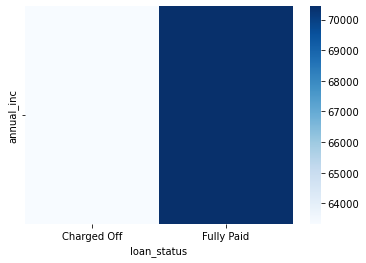

In [456]:
# Does annual income affect on defaults?
HM = pd.pivot_table(data=loan_data_filtered, columns = 'loan_status', values = 'annual_inc')
sns.heatmap(HM,cmap='Blues')


<AxesSubplot:xlabel='loan_status'>

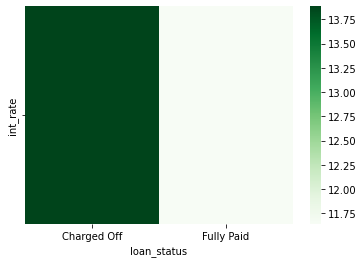

In [457]:
# Does intrest rate affect on defaults?
HM = pd.pivot_table(data=loan_data_filtered, columns = 'loan_status', values = 'int_rate')
sns.heatmap(HM,cmap='Greens')

<AxesSubplot:xlabel='loan_status', ylabel='home_ownership'>

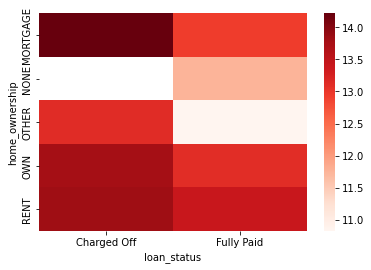

In [458]:
# Does intrest rate affect on defaults?
HM = pd.pivot_table(data=loan_data_filtered,index='home_ownership', columns = 'loan_status', values = 'dti')
sns.heatmap(HM,cmap='Reds')

## Conclusions

1. There were around 14% of loan defaulters
2. People have taken short term loans more than long term loans
3. The loans which were taken were majorily the people who already had loans and took to repay other loans
4. Only 25% loan applicants are source verified
5. If the interest rate is high, there will be high chance for user to become loan defaulter